# SETUP

In [1]:
# /mnt/lustre/scratch/CBRA/projects/CSVS/spanishTest/v2.0/machine_learning

In [2]:
%matplotlib inline
from dotenv import find_dotenv, load_dotenv
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
RANDOM_SEED = 42

In [4]:
plt.style.use("ggplot")
sns.set_context("notebook")

In [5]:
dotenv_file_path = Path(find_dotenv())
dotenv_file_path

PosixPath('/home/cloucera/projects/spanishTest/.env')

In [6]:
project_path = dotenv_file_path.parent
project_path

PosixPath('/home/cloucera/projects/spanishTest')

In [7]:
load_dotenv(dotenv_file_path)
data_path = Path(os.environ.get("DATA_PATH"))
data_path

PosixPath('/data/projects/spanishTest/v2')

In [8]:
labels_training_path = data_path.joinpath("ids_1000g.R")
y_train = pd.read_csv(labels_training_path, header=None, sep=" ", index_col=0, names=["nationality", "continent"])
y_train.head()

,nationality,continent
HG00096,British,European
HG00097,British,European
HG00099,British,European
HG00100,British,European
HG00101,British,European


In [9]:
y_train.shape

(2504, 2)

In [10]:
features_training_path = data_path.joinpath("plink.26.Q")
features_training_path

PosixPath('/data/projects/spanishTest/v2/plink.26.Q')

In [12]:
X_train = pd.read_csv(features_training_path, header=None, sep=" ")
X_train.index = y_train.index
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
HG00096,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.058456,0.078883,0.00001,0.00001,0.00001,0.339164,0.000010,0.00001
HG00097,0.00001,0.00001,0.00001,0.00001,0.000010,0.110726,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.000010,0.393844,0.00001
HG00099,0.00001,0.00001,0.00001,0.00001,0.000010,0.120551,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.358482,0.000010,0.00001
HG00100,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.205808,0.00001,0.243461,0.000010,0.00001,0.00001,0.00001,0.065509,0.000010,0.00001
HG00101,0.00001,0.00001,0.00001,0.00001,0.005575,0.000010,0.00001,0.00001,0.00001,0.00001,...,0.000010,0.00001,0.043336,0.000010,0.00001,0.00001,0.00001,0.050009,0.287784,0.00001


In [13]:
X_train.shape

(2504, 26)

In [14]:
train_data = pd.concat((X_train, y_train), axis=1)
train_data.reset_index(inplace=True)
train_data.columns = [str(col) for col in train_data.columns]
train_data.to_feather(data_path.joinpath("train_data.feather"))
train_data.head()

,index,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,nationality,continent
0,HG00096,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,...,0.058456,0.078883,0.00001,0.00001,0.00001,0.339164,0.000010,0.00001,British,European
1,HG00097,0.00001,0.00001,0.00001,0.00001,0.000010,0.110726,0.00001,0.00001,0.00001,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.000010,0.393844,0.00001,British,European
2,HG00099,0.00001,0.00001,0.00001,0.00001,0.000010,0.120551,0.00001,0.00001,0.00001,...,0.000010,0.000010,0.00001,0.00001,0.00001,0.358482,0.000010,0.00001,British,European
3,HG00100,0.00001,0.00001,0.00001,0.00001,0.000010,0.000010,0.00001,0.00001,0.00001,...,0.243461,0.000010,0.00001,0.00001,0.00001,0.065509,0.000010,0.00001,British,European
4,HG00101,0.00001,0.00001,0.00001,0.00001,0.005575,0.000010,0.00001,0.00001,0.00001,...,0.043336,0.000010,0.00001,0.00001,0.00001,0.050009,0.287784,0.00001,British,European


# Clustering

In [15]:
from sklearn import manifold
import numpy as np

query = y_train.continent == "European"

In [16]:
query = np.repeat(True, y_train.shape[0])

In [17]:
tsne = manifold.TSNE(init="pca", n_iter=10**4, metric="cosine")
X_t = tsne.fit_transform(X_train.loc[query, :])

KeyboardInterrupt: 

In [ ]:
data = pd.DataFrame(X_t, index=X_train.index[query], columns=["tsne_0", "tsne_1"])
data["nationality"] = y_train.loc[query, "nationality"]
data["continent"] = y_train.loc[query, "continent"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.set_palette("tab20")
sns.scatterplot(
    x="tsne_0",
    y="tsne_1",
    hue="nationality",
    data=data,
    ax=ax,
    s=50
)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
clf = RandomForestClassifier(n_estimators=10**3, n_jobs=-1, class_weight="balanced")

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(clf, X_train, y_train["nationality"].values.ravel(), cv=10, n_jobs=-1)

In [ ]:
clf = LogisticRegressionCV(penalty="l2", max_iter=10**5, n_jobs=-1)

In [ ]:
y_train_hat = cross_val_predict(clf, X_train.loc[query], y_train.loc[query, "nationality"].values.ravel(), cv=10, n_jobs=-1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train.loc[query, "nationality"], y_train_hat))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split

In [ ]:
xtr, xts, ytr, yts = train_test_split(X_train, y_train.nationality, test_size=0.3, stratify=y_train.nationality)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler, StandardScaler
from tpot.builtins import StackingEstimator, ZeroCount
from sklearn.model_selection import cross_val_score


# Average CV score on the training set was:0.9146285310055363
clf = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=40, p=2, weights="uniform")),
    StackingEstimator(estimator=LogisticRegression(C=5.0, dual=False, penalty="l1")),
    RobustScaler(),
    ZeroCount(),
    PCA(iterated_power=4, svd_solver="randomized"),
    LogisticRegression(C=20.0, dual=False, penalty="l1")
)

In [ ]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
clf = ExtraTreeClassifier()
clf = RidgeClassifierCV()
clf = GradientBoostingClassifier()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

classifiers = [
    (LogisticRegression(solver='lbfgs', random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (LinearSVC(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (GradientBoostingClassifier(n_estimators=50, random_state=0), {
        'learning_rate': np.logspace(-4, 0, 10)
    }),
    (SVC(random_state=0, gamma='scale'), {
        'C': np.logspace(-2, 7, 10)
    }),
]

def get_name(estimator):
    name = estimator.__class__.__name__
    if name == 'Pipeline':
        name = [get_name(est[1]) for est in estimator.steps]
        name = ' + '.join(name)
    return name

names = [get_name(e) for e, g in classifiers]

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
    
    fig, ax = plt.subplots()
    
    clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, iid=False)

    cm = ConfusionMatrix(clf, ax=ax)
    
    with ignore_warnings(category=ConvergenceWarning):
        cm.fit(xtr, ytr)

    cm.score(xts, yts)
    cm.finalize()
#     cm.poof()
    ax.set_title("{} Confusion Matrix".format(name))
    plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
from autoxgb import OptimizedXGB

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtr, xts, ytr, yts =  train_test_split(
    X_train, 
    y_train["nationality"].values.ravel() == "Spanish", 
    test_size=0.3,
    stratify=y_train["nationality"].values.ravel() == "Spanish"
)
xtr.shape, xts.shape, ytr.shape, yts.shape

In [ ]:
xgb = OptimizedXGB()

In [ ]:
%%capture

xgb.fit(xtr, ytr)

In [ ]:
ytr_hat = xgb.predict(xtr)
proba_train = xgb.predict_proba(xtr)

yts_hat = xgb.predict(xts)
proba_test = xgb.predict_proba(xts)

In [ ]:
print(classification_report(yts, yts_hat))

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.externals.funcsigs import signature

In [ ]:
def plot_model(proba, y, split):
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.externals.funcsigs import signature
    
    fpr, tpr, _ = roc_curve(y, proba[:, 1])
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y, proba[:, 1])
    precision, recall, _ = precision_recall_curve(y, proba[:, 1])

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # ROC
    lw = 2
    axes[0].plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title("ROC")
    axes[0].legend(loc="lower right")

    step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
    axes[1].step(recall, precision, color='b', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    # P-R curve
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.suptitle(split)
    # plt.tight_layout()

In [ ]:
plot_model(proba_train, ytr, split="training")

In [ ]:
plot_model(proba_test, yts, split="testing")

In [ ]:
np.random.rand(*proba_test.shape).shape

In [ ]:
plot_model(np.random.rand(*proba_test.shape), yts, split="testing")

In [ ]:
import numpy as np
for tr in np.linspace(0, 1, 10):
    hat = proba_test[:, 1] > tr
    print()
    print("*"*20)
    print(tr)
    print(classification_report(yts, hat))
    print(pd.crosstab(yts, hat, rownames=['truth'], colnames=['pred'], margins=True))
    print()

In [ ]:
xgb.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_score

clf = xgb.best_estimator_

cross_val_score(clf, X_train, y_train["nationality"].values.ravel() == "Spanish", cv=10, n_jobs=-1, scoring="average_precision")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler, StandardScaler
from tpot.builtins import StackingEstimator, ZeroCount
from sklearn.model_selection import cross_val_score


# Average CV score on the training set was:0.9146285310055363
spclf = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=KNeighborsClassifier(n_neighbors=40, p=2, weights="uniform")),
    StackingEstimator(estimator=LogisticRegression(C=5.0, dual=False, penalty="l1")),
    RobustScaler(),
    ZeroCount(),
    PCA(iterated_power=4, svd_solver="randomized"),
    LogisticRegression(C=20.0, dual=False, penalty="l1")
)

In [24]:
y_train_bin = y_train["nationality"].values.ravel() == "Spanish"

In [ ]:
cross_val_score(spclf, X_train, y_train_bin, cv=10, n_jobs=-1, scoring="average_precision")

In [ ]:
spclf.fit(X_train, y_train_bin)

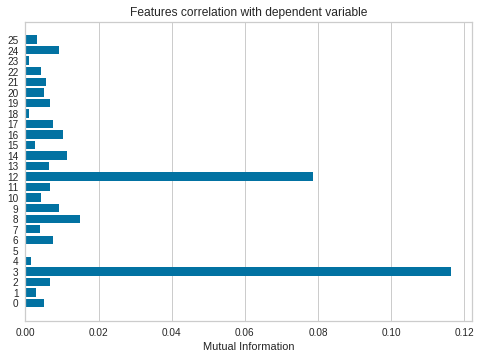

In [25]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(method='mutual_info-classification', labels=X_train.columns)
visualizer.fit(X_train, y_train_bin)
visualizer.poof()

In [ ]:
visualizer = FeatureCorrelation(labels=X_train.columns)
visualizer.fit(X_train, y_train_bin)
visualizer.poof()

In [ ]:
## load test data

In [ ]:
test_path = data_path.joinpath("samples")

In [ ]:
test_path

In [18]:
groups = []
sample_names = []
frames = []
for fpath in data_path.glob("**/*.Q"):
#     print(fpath)
    sample_name = fpath.parent.name
    group = fpath.parent.parent.name
    
    df = pd.read_csv(fpath, header=None, sep=" ")
    
    if df.shape[0] >= 1:
        groups.append(group)
        sample_names.append(sample_name)
        frames.append(df.iloc[0, :].copy())        

test_v2 = pd.concat(frames, axis=1, ignore_index=True).T
test_v2.index = sample_names
test_v2.drop("v2", axis=0, inplace=True)
test_v2.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
AC5390,0.000010,0.000010,0.000010,0.247413,0.019974,0.000010,0.015898,0.000010,0.000010,0.003232,...,0.000010,0.018222,0.056831,0.012823,0.010154,0.000010,0.000010,0.136553,0.139635,0.015021
AC5495,0.000010,0.000010,0.000010,0.272710,0.008325,0.000010,0.000901,0.000010,0.001869,0.006864,...,0.010808,0.028931,0.048422,0.063321,0.000010,0.000010,0.000010,0.035496,0.139502,0.004261
0071-018-COHO_2,0.000010,0.022463,0.000010,0.234458,0.032649,0.000010,0.014272,0.001247,0.000874,0.015086,...,0.012613,0.003407,0.000010,0.001556,0.000010,0.004286,0.002995,0.000010,0.384946,0.015251
AC5429,0.000015,0.002578,0.000013,0.263414,0.002529,0.000010,0.000010,0.000010,0.000357,0.004068,...,0.000010,0.007338,0.110378,0.024996,0.000010,0.000010,0.000010,0.072870,0.187758,0.000010
AC5497,0.000010,0.000010,0.000010,0.339984,0.015619,0.117941,0.004718,0.000010,0.000010,0.000573,...,0.000010,0.020949,0.000010,0.000010,0.000010,0.000010,0.000010,0.041564,0.246995,0.003436


In [22]:
data_test = test_v2.copy()
data_test["group"] = groups[1:]
data_test.reset_index(inplace=True)
data_test.columns = [str(col) for col in data_test.columns]
data_test.to_feather(data_path.joinpath("test_data.feather"))
data_test.head()

,index,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,group
0,AC5390,0.000010,0.000010,0.000010,0.247413,0.019974,0.000010,0.015898,0.000010,0.000010,...,0.018222,0.056831,0.012823,0.010154,0.000010,0.000010,0.136553,0.139635,0.015021,enod_140818
1,AC5495,0.000010,0.000010,0.000010,0.272710,0.008325,0.000010,0.000901,0.000010,0.001869,...,0.028931,0.048422,0.063321,0.000010,0.000010,0.000010,0.035496,0.139502,0.004261,enod_140818
2,0071-018-COHO_2,0.000010,0.022463,0.000010,0.234458,0.032649,0.000010,0.014272,0.001247,0.000874,...,0.003407,0.000010,0.001556,0.000010,0.004286,0.002995,0.000010,0.384946,0.015251,enod_140818
3,AC5429,0.000015,0.002578,0.000013,0.263414,0.002529,0.000010,0.000010,0.000010,0.000357,...,0.007338,0.110378,0.024996,0.000010,0.000010,0.000010,0.072870,0.187758,0.000010,enod_140818
4,AC5497,0.000010,0.000010,0.000010,0.339984,0.015619,0.117941,0.004718,0.000010,0.000010,...,0.020949,0.000010,0.000010,0.000010,0.000010,0.000010,0.041564,0.246995,0.003436,enod_140818


In [ ]:
test_v2_results = pd.DataFrame(
    {"is_spanish": spclf.predict(test_v2), "proba_spanish": spclf.predict_proba(test_v2)[:, 1], "group": groups},
    index=test_v2.index
)

In [ ]:
test_v2_results.head()

In [ ]:
test_v2_results.groupby("is_spanish").plot(kind="hist")

In [ ]:
test_v2_results.is_spanish.value_counts()

In [ ]:
test_v2_results.to_csv("test_v2_result_stacking.tsv", sep="\t", index=True, index_label="sample_name")

In [ ]:
sns.set_context("notebook")

sns.violinplot(x="is_spanish", y="proba_spanish", data=test_v2_results)

In [ ]:
test_v2_results[~test_v2_results.is_spanish]

In [ ]:
query_v2 = ["AC5399", "AC5378", "AC5390", "AC5409", "AC5415", "AC5532", "AC5533"]

test_v2_results.loc[query_v2, :]

In [ ]:
X_train.shape

In [ ]:
from sklearn.ensemble import IsolationForest

fig, axs = plt.subplots(7, 4, figsize=(22, 6*7), facecolor='w', edgecolor='k')
axs = axs.ravel()

df = X_train.loc[y_train_bin, :]

for i, column in enumerate(df.columns):
    isolation_forest = IsolationForest(contamination='auto', behaviour="new")
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(X_train[column].min(), X_train[column].max(), len(X_train)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clust = LocalOutlierFactor(n_neighbors=50, contamination='auto')

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.cluster import DBSCAN

# scale data first
X = StandardScaler().fit_transform(df)

db = clust.fit(X)

In [ ]:
db

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.crosstab(y_train.nationality.values, y_train.labels, rownames=['truth'], colnames=['pred'], margins=True) 

In [ ]:
v3_path = data_path.parent.joinpath("v3")
v3_path

In [ ]:
v3_projections_path = v3_path.joinpath("projections")

In [ ]:
sample_names = []
frames = []

for fpath in v3_projections_path.glob("**/*.Q"):
#     print(fpath)
    sample_name = fpath.parent.name
    
    df = pd.read_csv(fpath, header=None, sep=" ")
    
    if df.shape[0] >= 1:
        sample_names.append(sample_name)
        frames.append(df.iloc[0, :].copy())        
    
test_v3 = pd.concat(frames, axis=1, ignore_index=True).T
test_v3.index = sample_names
test_v3.head()

In [ ]:
test_v3.plot()

In [ ]:
v3_train_path = v3_path.joinpath("plink.3.Q")
v3_metadata_path = v3_path.joinpath("samples")

v3_metadata = pd.read_csv(v3_metadata_path, header=None, sep="\t", names=["class", "index"], index_col=1)

v3_train = pd.read_csv(v3_train_path, header=None, sep=" ")
v3_train.index = v3_metadata.index

In [ ]:
v3_metadata.head()

In [ ]:
v3_train.head()

In [ ]:
v3_tsne = pd.DataFrame(manifold.TSNE(random_state=42).fit_transform(v3_train))
v3_tsne.plot(kind="scatter", x=0, y=1, figsize=(16, 9))

In [ ]:
v3_train.plot(style=".", subplots=True, figsize=(16, 9))

In [ ]:
test_v3.index

In [ ]:
test_v3.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(v3_train)
y_pred_train = clf.predict(v3_train)
y_pred_test = clf.predict(test_v3)

In [ ]:
y_pred_train

In [ ]:
query = v3_metadata.loc[v3_train.index, "class"] == "IBS"
data_filt = v3_train.loc[query, :]

v3_tsne = pd.DataFrame(manifold.TSNE(random_state=42).fit_transform(data_filt), columns=["tsne0", "tsne1"], index=data_filt.index)
# v3_tsne["inlier"] = data_filt
v3_tsne["class"] = v3_metadata.loc[query, "class"].values
plt.figure(figsize=(16, 9))
sns.scatterplot(x="tsne0", y="tsne1", data=v3_tsne)

In [ ]:
v3_train.loc["HG01502"]

In [ ]:
v3_metadata["class"].value_counts()

In [ ]:
v3_tsne.inlier.value_counts()

In [ ]:
y_pred_test

In [ ]:
X_train.index.isin(v3_train.index).sum(), X_train.shape

In [ ]:
v3_data = v3_train.copy()
v3_data["class"] = v3_metadata.loc[v3_train.index, "class"].values

In [ ]:
query = v3_data["class"] == "IBS"
v3_data.loc[query, 1].plot(style=".")

In [ ]:
query =  v3_data["class"] == "TSI"
v3_data.loc[query, 1].plot(style=".")

In [ ]:
query =  v3_data["class"] == "NAV"
v3_data.loc[query, :].plot()

In [ ]:
v3_train.index.tolist()

In [ ]:
X_train.shape, y_train_bin.shape

In [ ]:
X_train_lof = X_train.loc[y_train_bin, :]

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, novelty=True, contamination=0.01)
clf.fit(X_train_lof)
pd.Series(clf.predict(X_train.loc[~y_train_bin, :])).value_counts(), sum(y_train_bin)

In [ ]:
pd.Series(clf.predict(test_v2)).value_counts()

In [ ]:
plt.plot(clf.decision_function(X_train))

In [ ]:
df1 = pd.DataFrame({"fun": spclf.decision_function(X_train), "nation": y_train.nationality, "proba":spclf.predict_proba(X_train)[:, 1]}, index=X_train.index)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.boxplot(x="nation", y="fun", data=df1, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
df2 = pd.DataFrame(
    {
        "fun": clf.decision_function(test_v2), 
        "proba": spclf.predict_proba(test_v2)[:, 1],
        "clf": clf.predict(test_v2),
        "group": groups
    }, 
    index=test_v2.index)
df2["nation"] = "v2"
df = pd.concat((df1, df2))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.boxplot(x="nation", y="fun", data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
c2_pred = pd.Series(clf.predict(test_v2), index=test_v2.index)

In [ ]:
query_v2 = ["AC5399", "AC5378", "AC5390", "AC5409", "AC5415", "AC5532", "AC5533"]
df2.loc[query_v2, :]

In [ ]:
query = (df2.proba > 0.9) & (df2.clf == -1)
df2.loc[query, :]

In [ ]:
dfs = df.groupby("nation").describe().loc[["v2", "Spanish"], :]
dfs

In [ ]:
query = ((df2.fun < dfs.fun["25%"]["Spanish"]) | (df2.fun > dfs.fun["75%"]["Spanish"])) & (df2.proba > 0.99)
print(sum(query))
df2.loc[query, :]

In [ ]:
query = (df2.fun < dfs.fun["25%"]["Spanish"])  & (df2.proba > 0.99)
print(sum(query))
df2.loc[query, :]

In [ ]:
df.groupby("nation").describe().loc[["v2", "Spanish"], :]